<h1 align="center"> Python for Data Analysis</h1>

<h6 align="left">
This project is carried out on employment data from the year 2009 to 2018 from Stats Wales to determine the change in each industry. The following are the steps taken with detailed explanations:
1.	Data processing
2.	Data analysis
2a.	Highest and lowest workers employed over the period by industry
2b.	Highest and lowest overall growth over the period by industry
2c.	Number of employments by year
3.	Visual analysis
4.	PCA / Correlation
4a.	PCA analysis
4b.	Year-wise correlation for each Industry
5.	Clustering (K means & hierarchical)
5a.	K-means Clustering Analysis
5b.	Hierarchical Cluster
6.	Discussion
</h6>

<h3 align="center">___________________________________________________________________________________________</h3>
<h3>Import all reqired libraries</h3>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster import hierarchy

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans  
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<h3>1. Data processing </h3>

<h4>Prerequisites files</h4>
           below files are expected to run the 'save_merged_dataframe' method in this script

1. 2009_export.csv
2. 2010_export.csv
3. 2011_export.csv
4. 2012_export.csv
5. 2013_export.csv
6. 2014_export.csv
7. 2015_export.csv
8. 2016_export.csv
9. 2017_export.csv
10. 2018_export.csv

<h4>Note: If the above files are not available, remain steps of the script can be run from the section 1.3 with the csv file of FINAL DATAFRAME format as mentioned in the question</h4>

Format of the files as below (for 2009_export.csv : this is the format after download from the https://statswales.gov.wales/Catalogue/Business-Economy-and-Labour-Market/People-and-Work/Employment/Jobs/Whole-Workforce/workplaceemployment-by-industry-area),

In [2]:
file_path = "/Users/omokehinde/Desktop/new/MSc/Programming for Data Analysis_S2_19/Assessment/Raw Data/"
df_sample = pd.read_csv(file_path +"2009_export.csv")
df_sample = df_sample.fillna(' ')
df_sample

,Unnamed: 0,Unnamed: 1,United Kingdom,Wales,Unnamed: 4,Wales .1
0,,,.,West Wales and the Valleys,East Wales,.
1,All industries,,29966500,783400,552900,1336300
2,All industries,"Agriculture, forestry and fishing",389600,25700,12000,37700
3,,Production,2832800,90200,66600,156700
4,,Construction,2169500,60700,35900,96600
5,,"Wholesale, retail, transport, hotels and food",7899000,207700,137700,345400
6,,Information and communication,1153800,12900,14900,27800
7,,Finance and insurance activities,1089300,13900,19800,33800
8,,Real estate activities,465500,7100,6500,13500
9,,"Professional, scientific and technical activit...",4572800,72400,72500,144800


<h4>Starting Data Process</h4>

In [36]:
#method to get the final, merged dataframe for all the years

#path of the files..files should be 2009_export.csv,2010_export.csv, ect..
file_path = "/Users/omokehinde/Desktop/new/MSc/Programming for Data Analysis_S2_19/Assessment/Raw Data/"


#this method is reading from the downloaded excel files, year wise. file should be,
# 2009_export.csv
# 2010_export.csv
# ....
# 2018_export.csv

def save_merged_dataframe():    
    df_in = ['Agriculture','Production','Construction','Retail','ICT','Finance','Real_Estate','Professional_Service','Public_Adminstration','Other_Service']
    dff= pd.DataFrame(df_in)
    dff.columns = ['Industry'] #assign the column header(only have one column in here)
    i = 0
    #loop through all exported files
    while i < 10:
        df = pd.read_csv(file_path +str(i+2009)+"_export.csv")
        
        #get the last column which contain required data
        df=df.iloc[:,[5]]
        df= df.rename(columns={'Wales .1':str(i+2009)})
        df.drop(df.index[[0,1]],inplace=True)
        df.reset_index(drop=True, inplace=True)
        
        #getting the mean val for Nan values
        df.fillna(df[str(i+2009)].apply(pd.to_numeric).mean(),inplace=True)   
        df[str(i+2009)] = df[str(i+2009)].apply(pd.to_numeric)
        
        #appending to the main DataFrame
        dff[str(i+2009)] = df[str(i+2009)]
        i += 1

    dff.to_csv(file_path+"merged_dataset.csv", index = False)

#calling the save method to save the dataframe as expected in the question (Final DataFrame)
save_merged_dataframe()

<h4>1.3 Retrieve the saved Final DataFrame</h4>

In [4]:
#this method reads from the saved file(Final DataFram)
def get_merged_dataframe():
    return pd.read_csv(file_path+'merged_dataset.csv')

df_merged = get_merged_dataframe()
df_merged

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
5,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
6,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
7,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
8,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
9,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


<h3>2. Data analysis</h3>

<h4>2.1 Highest and lowest workers employed over the period by Industry</h4>

In [5]:
# 2.1
#calling the method to get the initial dataframe, otherwise when run this code block twise, total get doubled,
#due to total performed on previous result.
df_merged = get_merged_dataframe()

plt.clf() #clear previous aeetings for plot

#adding row wise sum
df_merged["Total"] = df_merged.iloc[:,1:].sum(axis = 1)
df_merged.sort_values('Total', ascending = False)
df_merged.head()

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100,392800
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700,1622600
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800,945300
3,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600,3461700
4,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500,320700


<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Count')

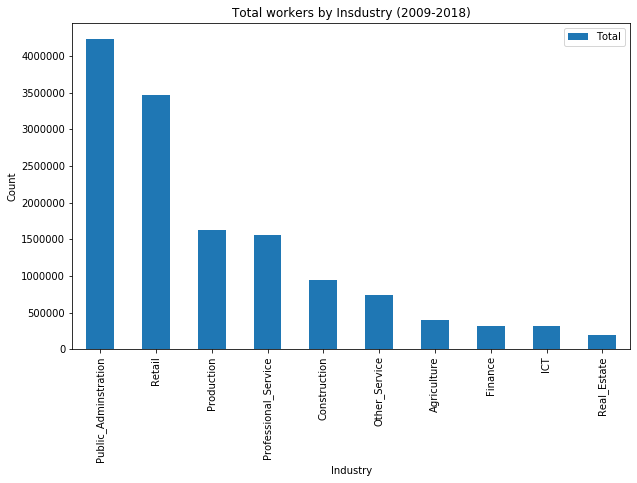

In [6]:
#plot the bar char for the total number of workers
df_merged.sort_values('Total', ascending = False).plot(kind='bar',x= 'Industry'
                     ,y = 'Total',title='Total workers by Insdustry (2009-2018)',figsize=(10, 6))
plt.ylabel("Count")

The bar graph illustrates the total number of people got employed by each industry from 2009 to 2018 in Wales. Public administration industry has hired the highest number of employees over the years meanwhile Real estate shows the lowest amounts. Retail and Public administration employed more than twice, compared to other industries.

<h4>2.2 Highest and lowest overall growth over the period by Industry</h4>

Text(0, 0.5, 'Count')

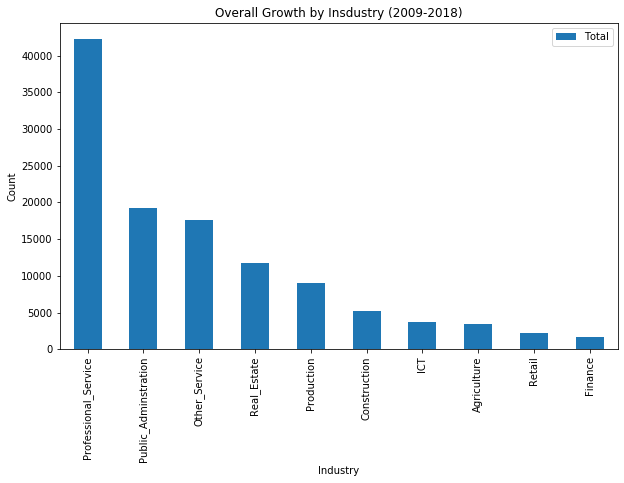

In [7]:
# 2.2
#calling the method to get the initial dataframe, otherwise when run this code block twise, total get doubled,
#due to total performed on previous result.
df_merged = get_merged_dataframe()
#df_merged

#get the difference with previous column(year) value.(2010 val - 2009 val)
growth_df = df_merged.set_index('Industry').diff(axis = 1,periods = 1)

#get overall growth
growth_df["Total"] = growth_df.iloc[:,1:].sum(axis = 1)

growth_df.sort_values('Total',ascending = False)

#plot the bar char for the overall growth
growth_df.sort_values('Total', ascending = False).plot(kind='bar',y = 'Total'
                                                       ,title='Overall Growth by Insdustry (2009-2018)',figsize=(10, 6))
plt.ylabel("Count")


The graph shows the overall growth of hiring in each industry from 2009 to 2018 in Wales. By employing more than 40000 people over 10 years, Professional service ranked top for the growth. On the other hand, the Finance sector hired less than 5000 employees which is the lowest. Overall, Professional service has become a high demand field over the decade.

<h4>2.3 Number of employment by Year</h4>

(1300000, 1500000)

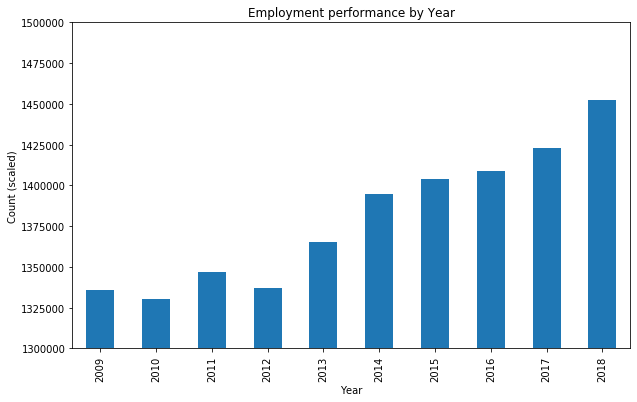

In [8]:
# 2.3
#calling the method to get the initial dataframe, otherwise when run this code block twise, total get doubled,
#due to total performed on previous result.
df_merged = get_merged_dataframe()

plt.clf() #clear previous aeetings for plot

#get total by year
df_byyear = df_merged.iloc[:,1:].sum(axis = 0)
df_byyear.plot(kind = 'bar',title='Employment performance by Year',figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Count (scaled)")
plt.ylim(1300000, 1500000)


The bar graph describes the rate of hiring people over the 10 years period. It is clear that in 2018, most people got employed. Meanwhile in 2010, the least amount of people hired. Moreover, the graph shows the employment for the selected industries in Wales has increased continuously from the year 2012 to 2018.

<h3>3. Visual analysis</h3>

In [9]:
# 3

df_merged = get_merged_dataframe()

# change the format of the dataframe to plot the dynamic scatter plot
# Columns format  = Industry, Count, Year 
column_names = ['Industry','Count', 'Year']
df_modified = pd.DataFrame(columns = column_names)
  
iterate = 0
while iterate < 10:
    loop_industry = 0
    while loop_industry < 10:
        new_row = {'Industry':str(df_merged.iloc[loop_industry,0]), 'Count':df_merged.iloc[loop_industry,(iterate+1)], 'Year':str(iterate+2009)}
        df_modified = df_modified.append(new_row,ignore_index=True)       
        loop_industry += 1
    iterate += 1

df_modified['Count']=df_modified['Count'].astype(str).astype(float)
df_modified.head()

,Industry,Count,Year
0,Agriculture,37700.0,2009
1,Production,156700.0,2009
2,Construction,96600.0,2009
3,Retail,345400.0,2009
4,ICT,27800.0,2009


In [26]:
# plot for the Change of workforce number over the period
px.scatter(df_modified, x="Count", y="Count", animation_frame="Year", animation_group="Industry", size="Count"
           , color="Industry",log_x=True,title="Change of Workforce number over the Period (2009-2018)").update(layout=dict(title=dict(x=0.5)))

<h3>4. PCA/Correlation </h3>

<h4>4.1 PCA Analysis</h4>

In [11]:
#4.1 

#calling the method to get the initial dataframe, otherwise when run this code block twise, total get doubled,
#due to total performed on previous result.
df_merged = get_merged_dataframe()

features = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
x = df_merged.loc[:, features].values
y = df_merged.loc[:,['Industry']].values

#scaling the dataset
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,-0.722944,-0.712345,-0.734524,-0.730311,-0.739850,-0.731262,-0.732126,-0.729848,-0.785431,-0.769321
1,0.174046,0.125885,0.178414,0.154620,0.205460,0.255949,0.234445,0.161541,0.175489,0.151322
2,-0.278972,-0.299239,-0.332831,-0.317393,-0.350299,-0.320806,-0.350933,-0.285274,-0.396139,-0.320821
3,1.596417,1.588280,1.553410,1.597587,1.547741,1.495632,1.596163,1.638720,1.471078,1.495344
4,-0.797568,-0.789708,-0.806813,-0.796886,-0.813308,-0.784175,-0.854783,-0.795600,-0.641563,-0.840254


In [59]:
#aaplying the PCA
pca = PCA(n_components=2)
pca
principalComponents = pca.fit_transform(x)
print("Explained Variance Ratio")
pca.explained_variance_ratio_

Explained Variance Ratio


array([0.99808273, 0.00102919])

In [13]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2'])
finalDf = pd.concat([principalDf, df_merged[['Industry']]], axis = 1)
finalDf

,pc 1,pc 2,Industry
0,-2.336228,-0.062033,Agriculture
1,0.574654,0.007002,Production
2,-1.028544,-0.068697,Construction
3,4.927032,-0.121161,Retail
4,-2.504829,0.084791,ICT
5,-2.503685,-0.078178,Finance
6,-2.816887,-0.057759,Real_Estate
7,0.438737,0.248729,Professional_Service
8,6.762305,0.023413,Public_Adminstration
9,-1.512556,0.023895,Other_Service


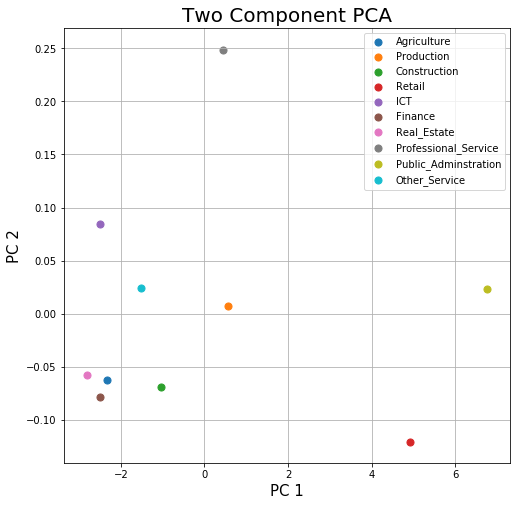

In [14]:
#plot the PCA results
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Two Component PCA', fontsize = 20)


targets = ['Agriculture', 'Production', 'Construction', 'Retail', 'ICT', 'Finance', 'Real_Estate', 'Professional_Service', 'Public_Adminstration', 'Other_Service']
colors = ['red', 'green', 'black', 'pink', 'back', 'purple', 'grey', 'violet', 'brown', 'Orange']
for target in targets:
    indicesToKeep = finalDf['Industry'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
               , finalDf.loc[indicesToKeep, 'pc 2']              
               , s = 50)
ax.legend(targets)
ax.grid()

According to the scatter plot, Principal component 1 is correlated to the total number of employed over the 10 years period. The public administration has the highest value in the PC1 axis and the real estate industry ranked the lowest. This behaviour is similar to the features of the bar graph in section 2.1. According to the plot, Public administration and Retail related points are much higher than other industry values. 

In the dynamic scatter plot in section 3, it is clearly identified that Professional service and Other service are positively correlated. They behave in a similar pattern. On the other hand, ICT and Retail behave opposite.

Explained variance ratio of the analysis shows that PC1 contains 99.81% of variance. Moreover, considering the highest and the lowest values of the PC2 axis, it indicates that a feature of Professional service is opposite to the Retail. In addition, PC2 axis shows Professional service is deviated from all the other industries in a feature.

<h4>4.2 Year wise Correlation for each Industry</h4>

In [15]:
#4.2

In [57]:
#convert the fields.
df_modified['Count']=df_modified['Count'].astype(str).astype(float)
df_modified['Year']=df_modified['Year'].astype(str).astype(int)

array = df_merged['Industry']
fig = make_subplots(rows=2, cols=5, shared_xaxes=True, subplot_titles=[f'{i}' for i in array])
ite = 0
print("Correlation of each industry over the years\n")
while ite < 10:   
    
    #plot the scatter plot with trend line
    df_i = df_modified.loc[df_modified['Industry']==array[ite]]
    fig_i = px.scatter(df_i, x="Year", y="Count", trendline="ols")
    trace_i = fig_i['data'][0]
    trace_i_1 = fig_i['data'][1]
    
    #print the correlation value over the year
    print(array[ite]+": "+str(df_i.corr().iloc[0,1]))
    
    if ite < 5 :
        fig.add_trace(trace_i, row=1, col=(ite+1))
        fig.add_trace(trace_i_1, row=1, col=(ite+1))
    else:
        fig.add_trace(trace_i, row=2, col=(ite-4))
        fig.add_trace(trace_i_1, row=2, col=(ite-4))
    
    ite += 1

fig.show()

Correlation of each industry over the years

Agriculture: 0.6906437128725659
Production: 0.6605828848606121
Construction: 0.4014453690001148
Retail: 0.11754064536999999
ICT: 0.5248046106196186
Finance: 0.21507973618434498
Real_Estate: 0.8247174534601301
Professional_Service: 0.8884606182935701
Public_Adminstration: 0.612054008266096
Other_Service: 0.8809717695346911


As shown in the above graphs, correlation for each industry over the 10 years can be identified separately. The data points of Professional service, Other service and Real_Estate industries are closer to the trend line which indicates a strong positive correlation. It is clearly shown in the correlation values 0.889, 0.881 and 0.825 respectively. Meanwhile data points of the Retail, Finance and construction are deviated from the line, indicating low correlation. The correlated values 0.118, 0.215 and 0.401 respectively. Moreover, all the graphs show that all the industries having a positive correlation between the hired amount and year.

Below matrix shows the overall correlation values for each industry.

In [32]:
#pivot the dataframe
df_pivoted = df_modified.pivot("Year","Industry", "Count")
df_pivoted.corr()

Industry,Agriculture,Construction,Finance,ICT,Other_Service,Production,Professional_Service,Public_Adminstration,Real_Estate,Retail
Industry,,,,,,,,,,
Agriculture,1.000000,0.727019,-0.005239,0.378069,0.333264,0.646564,0.636513,0.194875,0.668110,0.227534
Construction,0.727019,1.000000,0.309157,0.010326,-0.030656,0.188308,0.440657,0.080268,0.598064,0.414382
Finance,-0.005239,0.309157,1.000000,0.042842,0.242434,0.225092,0.388880,0.589635,0.316411,-0.252533
ICT,0.378069,0.010326,0.042842,1.000000,0.543306,0.231710,0.503172,0.122228,0.154186,-0.551669
Other_Service,0.333264,-0.030656,0.242434,0.543306,1.000000,0.577920,0.800549,0.739090,0.617589,-0.156339
Production,0.646564,0.188308,0.225092,0.231710,0.577920,1.000000,0.560187,0.546657,0.604355,0.028424
Professional_Service,0.636513,0.440657,0.388880,0.503172,0.800549,0.560187,1.000000,0.584972,0.622777,0.045887
Public_Adminstration,0.194875,0.080268,0.589635,0.122228,0.739090,0.546657,0.584972,1.000000,0.684273,-0.258487
Real_Estate,0.668110,0.598064,0.316411,0.154186,0.617589,0.604355,0.622777,0.684273,1.000000,0.232011


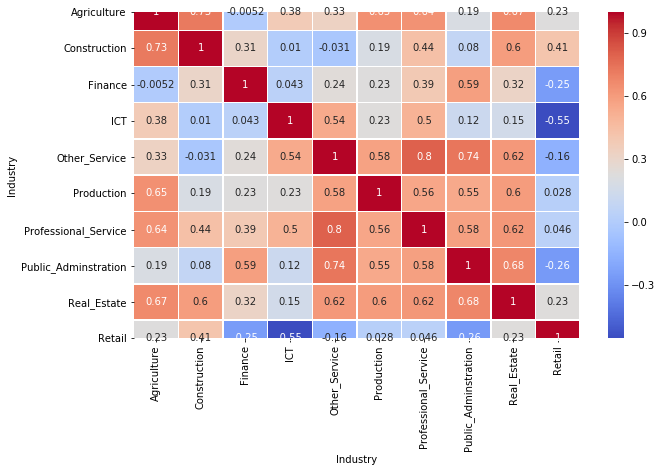

In [33]:
#plot the heatmap for Correlation for each industry for years
plt.figure(figsize=(10,6))
sns.heatmap(df_pivoted.corr(),cmap='coolwarm',annot=True, linewidth=0.5)# create seaborn heatmap

According to the above correlated map, Professional service and Other services are highly, positively correlated over the years. Public administration and Other services ranked secondly. On the other hand, heatmap shows negative correlation for ICT and Retail industries. When ICT hired more, Retail hiring became less and vice versa. These behaviours are clearly indicating in the dynamic scatter plot shown in section 3. In addition, negative correlation values are lesser than the positive values which indicate parallel increment is stronger than the divergent.

According to the map, most of the industries show positive correlation over the decade.

<h3>5. Clustering (k means & hierarchical)</h3>

<h4>5.1 K means Clustering Analysis</h4>

In [18]:
# 5.1
#calling the method to get the initial dataframe, otherwise when run this code block twise, total get doubled,
#due to total performed on previous result.

df_merged = get_merged_dataframe()

data = df_merged[['2010','2018']]
X = np.array(df_merged[['2010','2018']])

##
#scaling the values for better performance
stscaler = preprocessing.StandardScaler().fit(data)
X = stscaler.transform(data)

###################################################
#K = 2 Analysis
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(X)
kmeans2.cluster_centers_

array([[-0.46664081, -0.45446621],
       [ 1.86656323,  1.81786482]])

In [19]:
data2 = go.Scatter(
    x = X[:,0],
    y = X[:,1],
    mode = 'markers',
    text = df_merged['Industry'],
    marker = dict(size = 15,opacity=0.5,color = kmeans2.labels_
    )
)

clusters2 = go.Scatter(
    x = kmeans2.cluster_centers_[:,0],
    y = kmeans2.cluster_centers_[:,1],
    mode = 'markers',
    marker = dict(size = 20,opacity=0.5
    )
)
line_c2 = go.Scatter(
    x = X[:,0],
    y = X[:,0],
    mode = 'lines',
    marker = dict(size = 30,opacity=0.5
    )
)

data = [data2,clusters2,line_c2]
layout2 = go.Layout(
    autosize=True,
    title='K=2 Clustering',
    title_x=0.5,
    xaxis= go.layout.XAxis(title='Worst Performance(2010)'),
    yaxis= go.layout.YAxis(title='Best Performance(2018)'),
    )

fig = go.Figure(data=data, layout=layout2)
fig.update(layout_showlegend=False)
iplot(fig, filename='size-margins')


In [20]:
###################################################
#K = 3 Analysis
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(X)
a = kmeans3.cluster_centers_
kmeans3.transform(a)

array([[0.        , 2.36697792, 1.19445242],
       [2.36697792, 0.        , 3.55418863],
       [1.19445242, 3.55418863, 0.        ]])

In [21]:
data3 = go.Scatter(
    x = X[:,0],
    y = X[:,1],
    mode = 'markers',
    text = df_merged['Industry'],
    marker = dict(size = 15,opacity=0.5,color = kmeans3.labels_
    )
)

clusters3 = go.Scatter(
    x = kmeans3.cluster_centers_[:,0],
    y = kmeans3.cluster_centers_[:,1],
    mode = 'markers',
    marker = dict(size = 20,opacity=0.5
    )
)

line_c3 = go.Scatter(
    x = X[:,0],
    y = X[:,0],
    mode = 'lines',
    marker = dict(size = 30,opacity=0.5
    )
)

data = [data3,clusters3,line_c3]
layout = go.Layout(
    autosize=True,
    title='K=3 Clustering',
    title_x=0.5,
    xaxis= go.layout.XAxis(title='Worst Performance(2010)'),
    yaxis= go.layout.YAxis(title='Best Performance(2018)'),
    )

fig = go.Figure(data=data, layout=layout)
fig.update(layout_showlegend=False)
iplot(fig, filename='size-margins')

Above two scatter plots show the K means analysis results for K=2 and K=3 for the best and worst employment years. When K=2, Retail and Public administration industries observed under one cluster and remain industries observed in the other cluster. the average distance from the points to the large cluster centroid is higher.

When K=3, Retail and Public administration remain as it was when K=2. but Professional service and Production industries separated as a new cluster and remaining industries grouped in the other cluster.  In this scenario, the average distance from the points to each centroid is low compared to K=2 plot.

<h4>5.2 Hierarchical Cluster</h4>

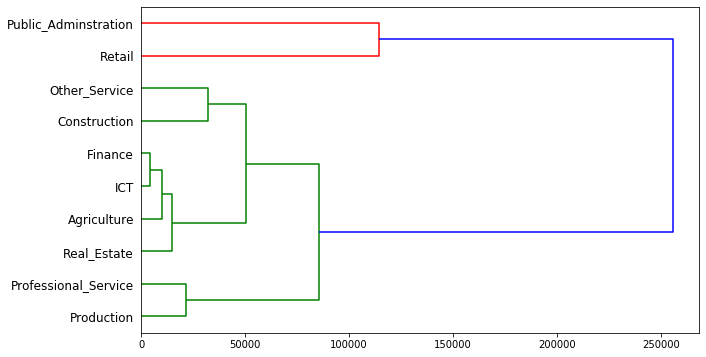

In [22]:
#5.2

Y = np.array(df_merged['Industry'])
P = df_merged[['2010','2018']]
P_modified = pd.get_dummies(P)

plt.figure(figsize=(10, 6))
Z3 = hierarchy.linkage(P_modified.values, 'single')
dn3 = hierarchy.dendrogram(Z3,labels=Y.tolist(),orientation='right')

Above dendrogram shows two clusters for the worst and best employment data for 2010 and 2018 in Wales. 'Single' methodology is used to plot the diagram hence branches grouping process start from the minimum amount values. Mainly, Public administration and Retail observed under one cluster and other industries group under other clusters since the distance is considerably higher. In the larger cluster, Professional service and Production again divided into another group with a shorter distance than Construction and Other service, as shown in the plot. this behaviour is similar to the K means, K=2 clusters.

<h3>6. Discussion</h3>

During the period of 2009 to 2018, the overall workforce of Wales increased. Majority preferred to join government administration opportunities or retail opportunities. 55.8% of Wales people were employed in public administration and in the retail industry. Furthermore, during the decade, the professional workers employment rate has impressively boosted. Meanwhile the hiring rate of few industries like Retail and Finance was fluctuated which caused hard to predict over the period.
 
According to the data, Wales has invested a large amount of money to serve the public more. Government has employed a large number of people in the public administration sector compared to all the other industry types.
 
2018 was a remarkable year for the people since most of the opportunities were available in 2018 compared to other previous years except for the ICT industry. ICT field indicates a sudden fallout in 2018 which was a very high number of people employed in 2017. It is an interesting measure because the development of technology should generate more ICT opportunities, but Wales deviates from that. Moreover, the analysis shows ICT jobs and Retail jobs show opposite characteristics. When ICT employment increases, retail hiring decreases.
 
There is a slight development in real estate and agriculture industries in Wales during the period. Both industries have a fluctuation in their workforce throughout the period. Though Wales is a large state, the real estate industry is ranked at the lowest in employment.
 
In conclusion, it is comparatively easier to find opportunities in public administration and retail industry than other sectors in Wales. But the retail industry has a large variation for the number of vacancies for each year. In addition, professional services are trending among the community and generating more opportunities for the people. On the other hand, finding a vacancy in real state and agriculture industries can be tough since the opportunities are comparatively low compared to other industries.
